<a href="https://colab.research.google.com/github/Rohith16-code/CodSoft/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install SVM

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
train_path= "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")


In [7]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
33689,Huangjia xianggang jingcha de zuihou yi ye (1...,drama,"The film consists of two police stories, and ..."
33690,Der Ost-Komplex (2016),documentary,"Even now, twenty-five years after German reun..."
33691,"""Get Your Skills On"" (2014)",family,Get Your Skills On is an exciting series of m...
33692,The Last Survivors (1975),drama,"After a passenger ship sinks, a ship's office..."


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33693 entries, 1 to 33693
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        33693 non-null  object
 1   GENRE        33693 non-null  object
 2   DESCRIPTION  33693 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [9]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,33693,33693,33693
unique,33693,27,33630
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,8492,9


In [10]:
train_data.isnull().sum()


TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [11]:
test_path= "/content/test_data.txt"
test_data = pd.read_csv(train_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [12]:
test_data

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
33689,Huangjia xianggang jingcha de zuihou yi ye (1...,drama,"The film consists of two police stories, and ..."
33690,Der Ost-Komplex (2016),documentary,"Even now, twenty-five years after German reun..."
33691,"""Get Your Skills On"" (2014)",family,Get Your Skills On is an exciting series of m...
33692,The Last Survivors (1975),drama,"After a passenger ship sinks, a ship's office..."


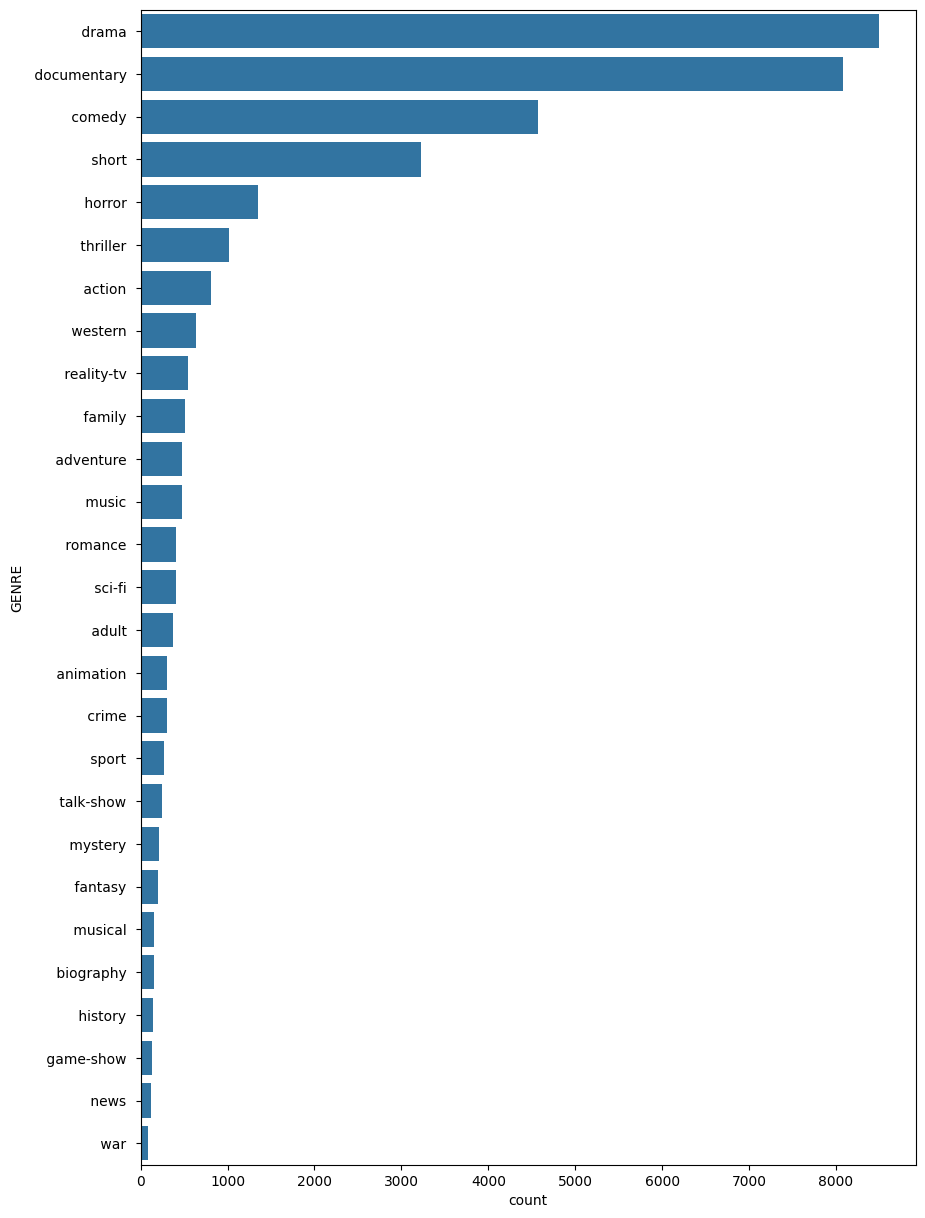

In [13]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

<ipython-input-14-0b66991f0745>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")


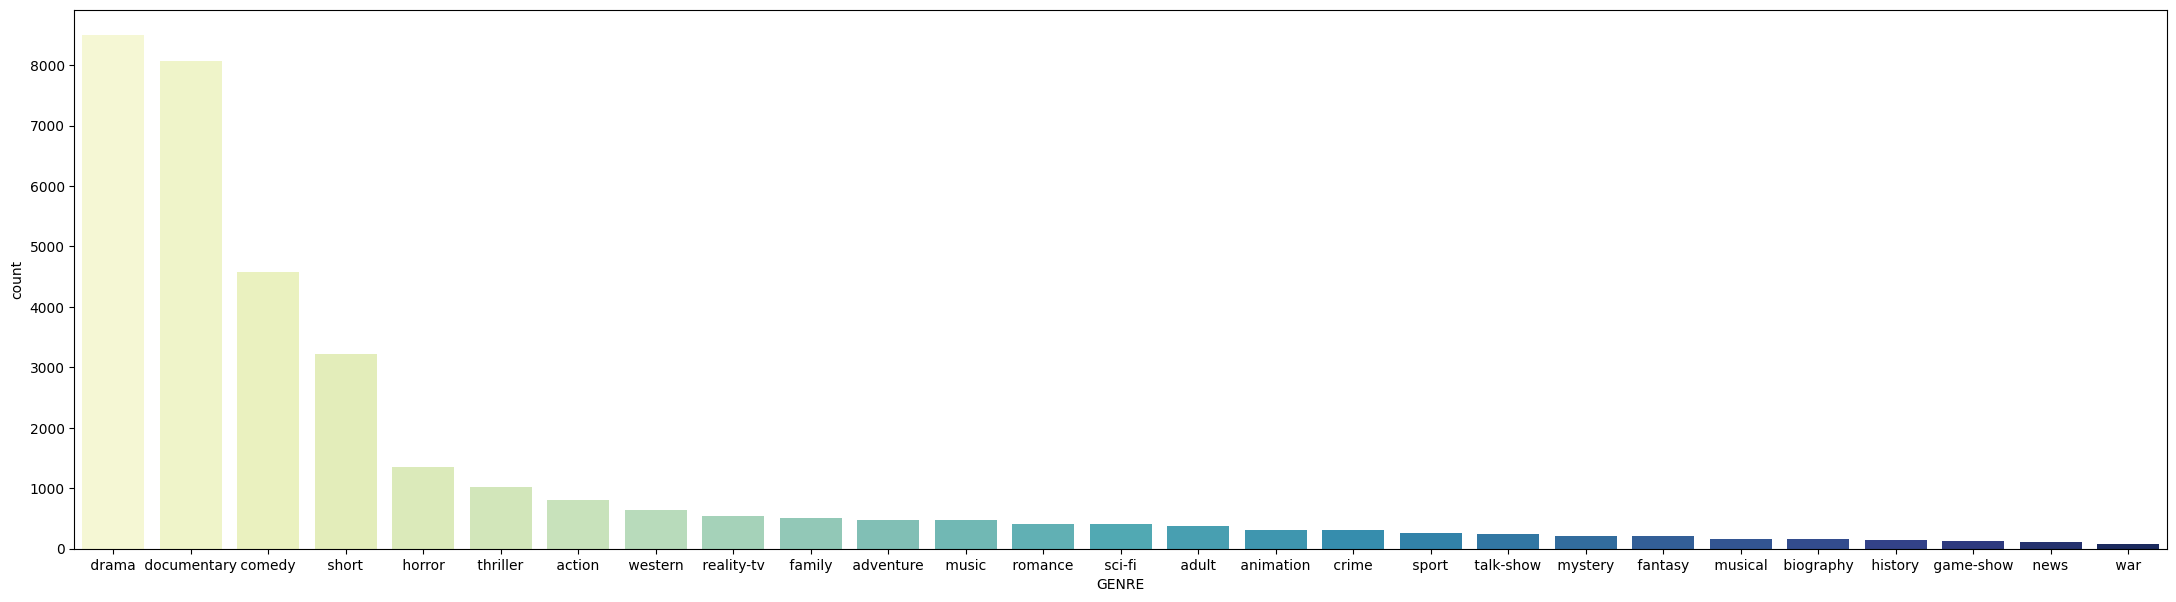

In [14]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()


In [15]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [16]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
33689,Huangjia xianggang jingcha de zuihou yi ye (1...,drama,"The film consists of two police stories, and ...",film consists two police stories happened with...
33690,Der Ost-Komplex (2016),documentary,"Even now, twenty-five years after German reun...",even twenty five years german reunification hi...
33691,"""Get Your Skills On"" (2014)",family,Get Your Skills On is an exciting series of m...,get skills exciting series magazine shows kids...
33692,The Last Survivors (1975),drama,"After a passenger ship sinks, a ship's office...",passenger ship sinks ship officer must decide ...


In [17]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(train_data["TextCleaning"])
X_test = vectorize.transform(test_data["TextCleaning"])

In [18]:
X = X_train
y = train_data["GENRE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [19]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [20]:
model.score(X_train, Y_train)

0.9056911775617719

In [22]:
y_pred = model.predict(X_test)
y_pred

array([' drama ', ' comedy ', ' documentary ', ..., ' documentary ',
       ' drama ', ' comedy '], dtype=object)

In [23]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5294554088143641
